In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../"*2)
import warnings
warnings.filterwarnings('ignore')

In [1]:
from quantumnetworks import SingleModeSystem, MultiModeSystem, plot_full_evolution, Decay
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'quantumnetworks'

We fit a decaying sinusoid of the form: $ a e^{- (\lambda/2) t} \cos(\omega t + \phi_0)$

In [54]:
# params directly provided

omega_0 = 2*np.pi*1
omega_range = 2*np.pi*np.linspace(0.5,1.5,21)
omegas = [omega_0] + list(omega_range)

num_modes = len(omegas)
kappas = np.zeros(num_modes)
gammas = np.zeros(num_modes)
kerrs = np.zeros(num_modes)

couplings = []
coupling_strength = .1
for i in range(1, num_modes):
    couplings.append([0,i,2*np.pi*coupling_strength])
    

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs": kerrs, "couplings":couplings})

x_0 = np.zeros(num_modes*2)
x_0[0] = 100 # num of photons initially 

ts = np.linspace(0, 20, 1000001)
X = sys.forward_euler(x_0, ts)

(44, 1000001)


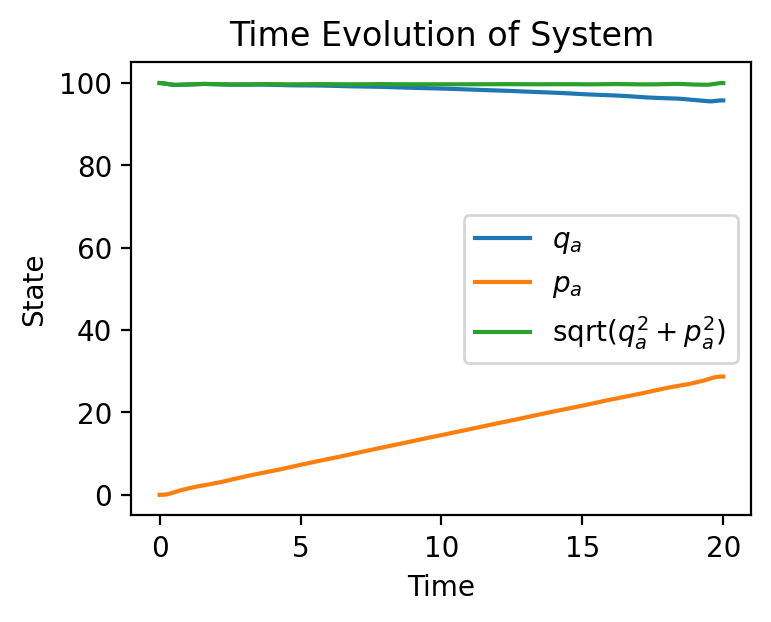

In [39]:
print(X.shape)
fig, ax = plot_full_evolution(X[:2], ts, labels=["$q_a$","$p_a$"])
plot_full_evolution([np.sqrt(X[0,:]**2+X[1,:]**2)], ts, labels=["sqrt($q_a^2 + p_a^2$)"], fig=fig, ax=ax)
ax.legend()

In [31]:
np.max(np.abs(sys.A - np.conj(sys.A.T)))

131.94689145077132

In [46]:
vals, U = np.linalg.eig(sys.A)
D = np.diag(vals)

In [51]:
np.max(np.abs(U*D*np.conj(U.T) - sys.A))

9.42477796076938